<h1> Assignment #6 </h1>
1. Please check the problem statement at https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3044/assignment-6-implement-sgd-for-linear-regression/3/module-3-foundations-of-natural-language-processing-and-machine-learning </br>
2. Implement your own version of sklearn SGDRegresser (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)</br>
3. Plot a chart of predicted values Vs actual values of your own SGD Implementation</br>
4. Now try out the SGDRegresser of sklearn and plot the chart of predicted values Vs actual values</br>
5. In a tabular format, compare the weights obtained from your own implementation with the weights obtained after applying sklearn's SGDRegresser.</br>
6. Also compare the MSE obtained from your custom implementation of SGDRegressor and that of sklearns implementation.</br>
7. Try to get the weights & MSE of your custom implementation, similar to the weights and MSE of sklearns implementation.

In [0]:
# libraries import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()


In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [0]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


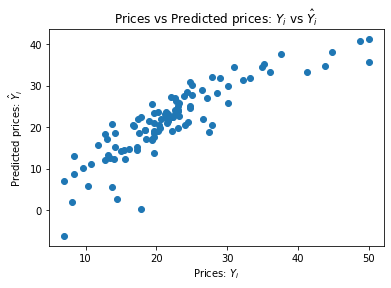

In [10]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

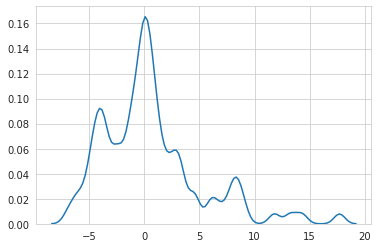

In [11]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


<h1> Custom SGD for linear Regression </h1>

In [0]:
class customSGD(object):

    """docstring for customSGD
        loss_logger = y/n: Put n in cross validation mode to avoid printing unnecessary printing at every iterations
        default constructor values are: loss = 'square' ,alpha = 0.000003,lambda_ = 0.1,max_epoch = 100000,batch_size = 2**8,loss_logger='N'
    """
    Weights = None
    mean_square_loss = None
    def __init__(self, loss = 'square' ,alpha = 0.000003,lambda_ = 0.1,max_epoch = 100000,batch_size = 2**8,loss_logger='N'):
        super(customSGD, self).__init__()
        self.loss = loss
        self.alpha = alpha
        self.max_iter = max_epoch
        self.batch_size = batch_size
        self.lambda_ = lambda_
        self.loss_logger = loss_logger

    def init_weight(self,data_shape):
        w = np.random.normal(loc=0.0,scale=0.1,size=data_shape)
        if self.loss_logger.lower() == 'y':
            print(" \n Weights Initiliazed !! Shape is: ", w.shape)
            print("\n")
        return w

    def SGD(self,x,y): 
        # Adding the bias term to training data to calculate the intercept as x0 * w0 
        epsilon = 0.0000001  
        # initializing the weight vector
        pre_w = self.init_weight(data_shape=x.shape[1])
        if self.loss_logger.lower() == 'y':
            print("Initialized weights are ",pre_w)
        w_next = None
        iter_count = 1
        saved_w = None
        loss = list()
        # Appending two values to stop abs(loss[iter_count] - loss[iter_count-1]) index out range error
        loss.append(10)
        loss.append(10)
        if self.loss_logger.lower() == 'y':
            print("starting Batch SGD now ... \n")
        for iter_count in (range(1,self.max_iter+1)): # for iter =2 we append loss[2]
            #import pdb
            #pdb.set_trace()
            if abs(loss[iter_count]) > 2 and abs(loss[iter_count-1]) > 3 and not np.any(np.isnan(pre_w)): # stopping SGD with loss tolerance of 2 and 3
                k = np.random.choice(np.arange(0,y.shape[0] - self.batch_size))
                w_next = pre_w - ((self.alpha / self.batch_size) * (((x[k:k+self.batch_size].T@(self.y_pred(pre_w,x[k:k+self.batch_size]) - y[k:k+self.batch_size])))  + (self.lambda_ * pre_w)))
                # plotting the current loss vs iterations
                #iter_count +=1
                loss.append(self.mse_loss(x[k:k+self.batch_size],y[k:k+self.batch_size],pre_w)) # loss caused by previous w instead of next
                pre_w = w_next
                # creating dynamic alpha to auto decrease it's values.
                #print(loss)
                if (iter_count % 10000 == 0 or iter_count in [2,3,4,5]) and self.loss_logger.lower() == 'y':
                    #self.alpha = epsilon + self.alpha / (np.sqrt(loss[iter_count])+epsilon) # avoid divide by zero error
                    print("loss at iteration {0} is {1} ".format(iter_count,loss[iter_count]))
                    
                # if k has reached to the end of data points, so before stopping we need to return weight.
                if iter_count == self.max_iter:
                    customSGD.mean_sqaure_loss = loss[iter_count]
                    if self.loss_logger.lower() == 'y':
                        print("Max iteration limit reached \n")
                        print("Final Loss is: ",customSGD.mean_sqaure_loss)
                        fig,ax = plt.subplots()
                        # removing 0 and 1 indexed elements
                        loss.pop(0) 
                        loss.pop(1)
                        ax.plot(np.arange(0,iter_count),loss)
                        ax.set_title("MSE vs iterations ")
                        plt.xlabel("No of iterations")
                        plt.ylabel("Mean Square Loss")
                        plt.show()
                        return w_next
                    else:
                        return w_next

            
            else:
                print("*********** SGD has converged to minima ***************")
                if np.any(np.isnan(pre_w)):
                    print("Weights has become NaN values")
                    print("Please choose lesser learning rate")
                customSGD.mean_sqaure_loss = loss[iter_count]
                print("Max iteration limit reached \n")
                if self.loss_logger.lower() == 'y':
                    print("Final Loss is: ",customSGD.mean_sqaure_loss)
                    fig,ax = plt.subplots()
                    # removing 0 and 1 indexed elements
                    loss.pop(0) 
                    loss.pop(1)
                    ax.plot(np.arange(0,iter_count),loss)
                    ax.set_title("MSE vs iterations ")
                    plt.xlabel("No of iterations")
                    plt.ylabel("Mean Square Loss")
                    plt.show()
                    return w_next
                else:
                    return w_next

    # compute the MSE loss and weight difference 
    def mse_loss(self,x,y,w):
        if self.loss.upper() in "SQUARE":
            #import pdb
            #pdb.set_trace()
            if x.shape[1] + 1 == w.shape[0]: # for calculating mse loss directly with x and y.
                x = np.c_[np.ones((x.shape[0])),x]
            return (1/ (2*x.shape[0])) * ((self.y_pred(w,x) - y).T@(self.y_pred(w,x) - y) + self.lambda_ * LA.norm(w,ord=2)) # L2 norm of weight vector Ridge Regression
        else:
            raise ValueError('Please enter proper loss type i.e. square')

    # predict method to predict hyper planes
    def y_pred(self,w,x):
        return x@w

    # fit method to fit the training data 
    def fit(self,x,y):
    # call the SGD function to converge
        x = np.c_[np.ones((x.shape[0])),x]
        customSGD.Weights = self.SGD(x,y)
        return self

    # tranform the given matrix
    def transform(self,x):
        x = np.c_[np.ones((x.shape[0])),x]
        return self.y_pred(customSGD.Weights,x)

    def fit_transform(self,x,y):
        x = np.c_[np.ones((x.shape[0])),x]
        customSGD.Weights = self.SGD(x,y)
        return self.y_pred(customSGD.Weights,x)



In [0]:
sgd_regsr = customSGD(loss='square',alpha=0.000006,lambda_ = 0.19, max_epoch=100000,batch_size=2**8,loss_logger='Y')

 
 Weights Initiliazed !! Shape is:  (14,)


Initialized weights are  [ 0.0278587  -0.04050333  0.07020386  0.19854145 -0.2603957  -0.10521062
  0.05836907 -0.16770974 -0.04960215 -0.0639284  -0.11458893  0.09122051
  0.03036161  0.03229437]
starting Batch SGD now ... 

loss at iteration 2 is 2283.0194114485466 
loss at iteration 3 is 1592.398201418965 
loss at iteration 4 is 1077.2199541828143 
loss at iteration 5 is 761.7360610768412 
loss at iteration 10000 is 22.73209030997461 
loss at iteration 20000 is 21.210382789775583 
loss at iteration 30000 is 22.21655062334313 
loss at iteration 40000 is 17.916671741805704 
loss at iteration 50000 is 20.508145537794324 
loss at iteration 60000 is 19.17597709208529 
loss at iteration 70000 is 16.55537898426894 
loss at iteration 80000 is 16.099313762680914 
loss at iteration 90000 is 17.08048870920844 
loss at iteration 100000 is 16.72592646452869 
Max iteration limit reached 

Final Loss is:  16.72592646452869


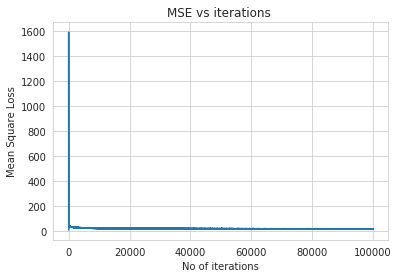

In [14]:
sgd_regsr.fit(x=X_train,y=Y_train)

In [15]:
print(sgd_regsr.Weights)

[ 0.21126133 -0.14097272  0.07988974 -0.03649466 -0.16789641 -0.01896193
  2.07749056  0.0743168  -0.20139276  0.14423434 -0.00493534  0.26927691
  0.02443338 -0.73502428]


In [16]:
print(sgd_regsr.mean_sqaure_loss)

16.72592646452869


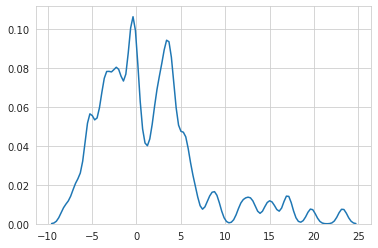

In [17]:
delta_y = Y_test - sgd_regsr.transform(x = X_test);

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

100%|██████████| 99/99 [18:44<00:00, 11.47s/it]


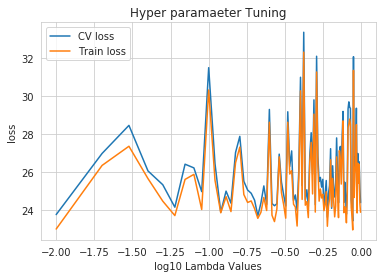

In [18]:
# hypertuning of parameters 
X_train_, X_cv_, Y_train_, Y_cv_ = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 5)
reg_hyper_loss_cv = list()
reg_hyper_loss_train = list()
from tqdm import tqdm
for i in tqdm(np.arange(0.01,1,10**-2)):
    reg_hyper = customSGD(loss='square',alpha=0.000006,lambda_ = i, max_epoch=10000,batch_size=2**6,loss_logger='N')
    reg_hyper.fit(x=X_train_,y=Y_train_)
    reg_hyper.transform(X_cv_)
    reg_hyper_loss_cv.append(reg_hyper.mse_loss(x=X_cv_,y=Y_cv_,w=reg_hyper.Weights))
    reg_hyper_loss_train.append(reg_hyper.mse_loss(x=X_train_,y=Y_train_,w=reg_hyper.Weights))

plt.plot(np.log10(np.arange(0.01,1,10**-2)),reg_hyper_loss_cv,label='CV loss')
plt.plot(np.log10(np.arange(0.01,1,10**-2)),reg_hyper_loss_train,label='Train loss')
plt.legend()
plt.xlabel("log10 Lambda Values")
plt.ylabel("loss")
plt.title("Hyper paramaeter Tuning")
plt.show()    



Here the iterations are less to avoid hyper tuning delays. Looking at above plot we can choose values slightly greater than -1.75 but there are sudden spike after that. If we look for more stable reason we can go values around -0.75.

 
 Weights Initiliazed !! Shape is:  (14,)


Initialized weights are  [ 0.02407683  0.08304135  0.03570005  0.14142848  0.14553433 -0.22989931
 -0.03874077 -0.12770118  0.2251954   0.056762   -0.19205178  0.18215788
 -0.00466982 -0.10070776]
starting Batch SGD now ... 

loss at iteration 2 is 5858.618352726667 
loss at iteration 3 is 4203.58177712317 
loss at iteration 4 is 3156.869418756889 
loss at iteration 5 is 2375.9925897281323 
loss at iteration 10000 is 21.63783201577338 
loss at iteration 20000 is 21.507744441914774 
loss at iteration 30000 is 20.34814996934515 
loss at iteration 40000 is 21.27826431842807 
loss at iteration 50000 is 19.032909867238498 
loss at iteration 60000 is 19.0767959513716 
loss at iteration 70000 is 16.525793201421354 
loss at iteration 80000 is 17.749699142178155 
loss at iteration 90000 is 15.943921691679044 
loss at iteration 100000 is 16.895472677049682 
Max iteration limit reached 

Final Loss is:  16.895472677049682


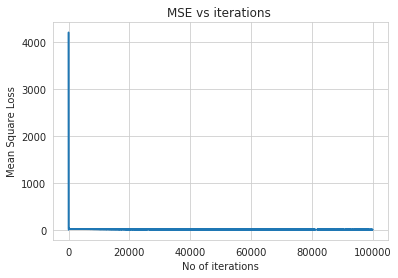

In [19]:
# choosing lambda as 10**-0.75
sgd_regsr_test = customSGD(loss='square',alpha=0.000006,lambda_ = 10**-0.75, max_epoch=100000,batch_size=2**8,loss_logger='Y')
sgd_regsr_test.fit(X_train,Y_train)


In [20]:
# computing mse loss for test dataset
print("The MSE loss on test data set is: ",sgd_regsr_test.mse_loss(X_test,Y_test,sgd_regsr_test.Weights))

The MSE loss on test data set is:  18.530275761280517


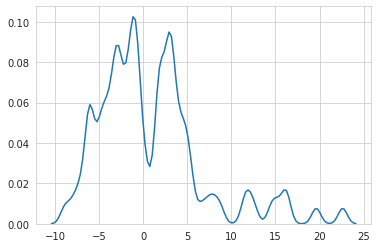

In [21]:
delta_y = Y_test - sgd_regsr_test.transform(x = X_test);

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

<h1> Linear Regression with Sklearn SGD Regressor  </h1>

In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor
# We will be testing out SGD regressor under same circumstances for constant learning rate first.
"""
SGDRegressor(loss=’squared_loss’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, 
random_state=None, learning_rate=’invscaling’, eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
"""

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=200000,tol=1,learning_rate='constant',eta0=0.000003)
reg.fit(X_train,Y_train)
mse_skloss = (1/(2*X_train.shape[0]))*((reg.predict(X_train) - Y_train).T @ (reg.predict(X_train) - Y_train))
print("The MSE Loss is ",mse_skloss)


The MSE Loss is  42.6364307682816


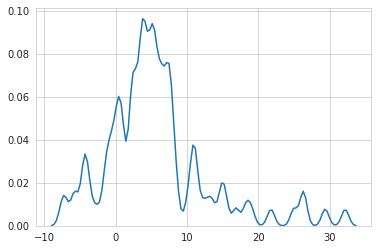

In [23]:
delta_y = Y_test - reg.predict(X_test);

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


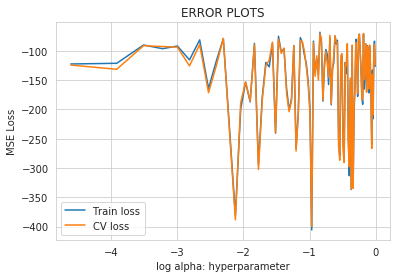

In [24]:
from sklearn.model_selection import GridSearchCV
reg_gs = SGDRegressor(max_iter=200000,tol=1,learning_rate='constant',eta0=0.000003)
param = {'alpha':np.arange(0.01,1,10**-2)}
gs = GridSearchCV(reg_gs,param,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,return_train_score=True)
gs.fit(X_train,Y_train)
train_loss= gs.cv_results_['mean_train_score']
cv_loss = gs.cv_results_['mean_test_score'] 

plt.plot(np.log(param['alpha']), train_loss, label='Train loss')
plt.plot(np.log(param['alpha']), cv_loss, label='CV loss')
plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("MSE Loss")
plt.title("ERROR PLOTS")
plt.show()

The mean square error here is negative because sklearn implementation for Gridsearch work with this ideology : greater is good means whoever maximizes the values for that scoring function is better hyper parameters. That being said here if let say there are three losses l1>l2>l3 and if their respective alpha's are a1,a2,a3 then our gridsearch will return l1 alpha as it follows biggger the better policies. But if we put take negative of scoring object our inequalities become l3>l2>l1 and it will choose l3 alpha now that's what we want. So In sklearn they only fliping the sign of scorer object. 

In [25]:
reg_test = SGDRegressor(alpha=10**-2.8,max_iter=200000,tol=1,learning_rate='constant',eta0=0.000003)
reg_test.fit(X_train,Y_train)
mse_skloss_test = (1/(2*X_train.shape[0]))*((reg_test.predict(X_train) - Y_train).T @ (reg_test.predict(X_train) - Y_train))
print("Loss : ",mse_skloss_test)

Loss :  33.81407860031293


In [27]:
# computing mse loss for test data set 
print("The Sklearn MSE loss on Test data set is :",(1/(2*X_test.shape[0]))*( (reg_test.predict(X_test) - Y_test).T @ (reg_test.predict(X_test) - Y_test)))

The Sklearn MSE loss on Test data set is : 35.547173541768245


<h2> sklearn SGD Regressor with adaptive learning rate


In [36]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

"""
SGDRegressor(loss=’squared_loss’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, 
random_state=None, learning_rate=’invscaling’, eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
"""

reg = SGDRegressor(alpha=0.19,max_iter=100000,learning_rate='adaptive',eta0=0.000003)
reg.fit(X_train,Y_train)
mse_skloss = (1/(2*X_train.shape[0]))*((reg.predict(X_train) - Y_train).T @ (reg.predict(X_train) - Y_train))
print("MSE Loss is ",mse_skloss)


MSE Loss is  28.81865356724928


In [32]:
from prettytable import PrettyTable
p = PrettyTable()
# inserting intercept term of sklearn regressor to the very begining of coefficient array
sklearn_w = np.append(reg_test.intercept_,reg_test.coef_)
p.field_names = ['sklearn weights','custom sgd weights']
for i in range(0,sklearn_w.shape[0]):
    p.add_row([sklearn_w[i],sgd_regsr_test.Weights[i]])
print(p)

+----------------------+------------------------+
|   sklearn weights    |   custom sgd weights   |
+----------------------+------------------------+
| 0.016000730742853717 |  0.20557509720528874   |
| -0.16247996861622846 |  -0.1373544718664493   |
| 0.13476588820506474  |  0.07724894474242212   |
| -0.0664688359918734  |  -0.02628641921694198  |
| 0.010664571693105392 |  0.22654796871303734   |
| 0.006299250965658985 |   -0.141564198796954   |
|  0.1832238384834535  |   1.9780618793648894   |
| 0.07762546742638914  |  0.07964869608108373   |
| 0.018372802425876238 |  -0.07008262245769371  |
| 0.02568781505452156  |   0.1474994885041678   |
| 0.012495707373328823 | -0.0038592236598564917 |
| 0.12270064840190176  |   0.2579521054974638   |
| 0.048254845657052195 |  0.024981733521513397  |
| -0.4648800632722345  |  -0.7476412258997734   |
+----------------------+------------------------+


<h2> Final Obversation </h2>
The loss under given circumstances i.e at fixed learning for both custom and sklearn custom model performed far better may be due to freedom to select batch size. </br>
* The loss for Custom SGD on Test data is 18.4 for 1 Lakh iterations </br>
* The loss for Sklearn SGD on Test data is 33 for 2 Lakh iterations (constant learning rate) and 28 for 1 lakh iterations (Adaptive learning rate).</br>